<a href="https://colab.research.google.com/github/Annie-blare/WSL-FINALCODE/blob/main/TotalOilSeeds_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###########FOR 1D CAPABILITY VECTOR
###########ANALYSIS BETWEEN FACTOR AND CAPABILITY VECTOR

In [ ]:
###########(1.)FOR 1ST DISTRICT ANALYSIS

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def perform_analysis(file_path, district_name, factor, Capability_Vector, perturbations):
    """
    Perform analysis on the impact of perturbations on a given factor.

    Parameters:
    - file_path: str, path to the dataset.
    - district_name: str, the name of the district for analysis.
    - factor: str, the name of the factor column.
    - Capability_Vector: str, the name of the capability vector column.
    - perturbations: list, a list of perturbation percentages.
    """

    # Load the dataset
    data = pd.read_csv(file_path)

    # Selecting the specified factor and capability vector
    X = data[[factor]]
    y = data[Capability_Vector]

    # Performing linear regression
    model = LinearRegression()
    model.fit(X, y)
    m = model.coef_[0]  # Slope
    c = model.intercept_  # Intercept

    # Extracting factor value for the specified district
    district_factor_value = data.loc[data['District'] == district_name, factor].iloc[0]

    # User provided perturbations in percentages, converting to fractions
    perturbations_corrected = [p / 100.0 for p in perturbations]

    # Calculating old value for the capability vector in the specified district
    cv_old = data.loc[data['District'] == district_name, Capability_Vector].iloc[0]

    # Min-max normalization for old value
    cv_min = y.min()
    cv_max = y.max()
    normalized_cv_old = (cv_old - cv_min) / (cv_max - cv_min)

    # Applying perturbations and calculating new values
    results = []
    for p in perturbations_corrected:
        perturbed_factor_value = district_factor_value * (1 + p)
        cv_new = m * perturbed_factor_value + c
        normalized_cv_new = (cv_new - cv_min) / (cv_max - cv_min)
        change_in_cv = cv_new - cv_old
        impact = normalized_cv_new - normalized_cv_old

        results.append({
            'Perturbation (%)': p*100,
            f'{Capability_Vector} (old)': cv_old,
            f'Normalized {Capability_Vector} (old)': normalized_cv_old,
            f'{Capability_Vector} (new)': cv_new,
            f'Normalized {Capability_Vector} (new)': normalized_cv_new,
            f'Change in {Capability_Vector}': change_in_cv,
            'Impact': impact
        })

    results_df = pd.DataFrame(results)
    return results_df

# Example usage
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Update this path as needed
district_name = 'BENGALURU'
factor = 'TotalNPK'  # This could be any factor like 'NPK', 'PesticideUse', etc.
Capability_Vector = 'TotalOilSeeds_Production'  # This could be any CV like 'Maize Production', 'Wheat Yield', etc.
perturbations = [-20, -10, 10, 20]  # Example perturbations in percentages

# Perform the analysis
results_df = perform_analysis(file_path, district_name, factor, Capability_Vector, perturbations)
print(results_df)


   Perturbation (%)  TotalOilSeeds_Production (old)  \
0             -20.0                             162   
1             -10.0                             162   
2              10.0                             162   
3              20.0                             162   

   Normalized TotalOilSeeds_Production (old)  TotalOilSeeds_Production (new)  \
0                                   0.001003                    15148.494514   
1                                   0.001003                    16123.334811   
2                                   0.001003                    18073.015404   
3                                   0.001003                    19047.855701   

   Normalized TotalOilSeeds_Production (new)  \
0                                   0.129541   
1                                   0.137903   
2                                   0.154625   
3                                   0.162986   

   Change in TotalOilSeeds_Production    Impact  
0                        14986.4

In [ ]:
#####################(2.)FOR ALL 30 DISTRICT ANALYSIS

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def district_analysis(file_path, factor, Capability_Vector, user_perturbations):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Performing linear regression on the entire dataset
    X = data[[factor]]
    y = data[Capability_Vector]
    model = LinearRegression()
    model.fit(X, y)
    m = model.coef_[0]  # Slope
    c = model.intercept_  # Intercept

    # User provided perturbations in percentages
    perturbations_corrected = [p / 100.0 for p in user_perturbations]

    # Min-max normalization parameters for Capability_Vector
    Capability_Vector_min = y.min()
    Capability_Vector_max = y.max()

    # Loop through each unique district in the dataset
    for district in data['District'].unique():
        district_factor = data.loc[data['District'] == district, factor].iloc[0]
        Capability_Vector_old = data.loc[data['District'] == district, Capability_Vector].iloc[0]
        normalized_Capability_Vector_old = (Capability_Vector_old - Capability_Vector_min) / (Capability_Vector_max - Capability_Vector_min)

        district_results = []

        # Applying perturbations and calculating new values for each perturbation
        for p in perturbations_corrected:
            perturbed_factor = district_factor * (1 + p)
            Capability_Vector_new = m * perturbed_factor + c
            normalized_Capability_Vector_new = (Capability_Vector_new - Capability_Vector_min) / (Capability_Vector_max - Capability_Vector_min)
            change_in_Capability_Vector = Capability_Vector_new - Capability_Vector_old
            impact = normalized_Capability_Vector_new - normalized_Capability_Vector_old

            district_results.append({
                'Perturbation (%)': p * 100,
                f'{Capability_Vector}_old': Capability_Vector_old,
                f'Normalized_{Capability_Vector}_old': normalized_Capability_Vector_old,
                f'{Capability_Vector}_new': Capability_Vector_new,
                f'Normalized_{Capability_Vector}_new': normalized_Capability_Vector_new,
                f'Change_in_{Capability_Vector}': change_in_Capability_Vector,
                'Impact': impact
            })

        # Convert the district results into a DataFrame and print it
        district_df = pd.DataFrame(district_results)
        print(f"Results for {district}:")
        print(district_df)
        print("\n")  # Add a newline for better readability between districts

# Example Usage:
file_path = '/content/Agriculture_KAG_2016_17.csv'
factor = 'TotalNPK'
Capability_Vector = 'TotalOilSeeds_Production'
user_perturbations = [-20,-10,10,20]
district_analysis(file_path, factor, Capability_Vector, user_perturbations)


Results for BENGALURU:
   Perturbation (%)  TotalOilSeeds_Production_old  \
0             -20.0                           162   
1             -10.0                           162   
2              10.0                           162   
3              20.0                           162   

   Normalized_TotalOilSeeds_Production_old  TotalOilSeeds_Production_new  \
0                                 0.001003                  15148.494514   
1                                 0.001003                  16123.334811   
2                                 0.001003                  18073.015404   
3                                 0.001003                  19047.855701   

   Normalized_TotalOilSeeds_Production_new  \
0                                 0.129541   
1                                 0.137903   
2                                 0.154625   
3                                 0.162986   

   Change_in_TotalOilSeeds_Production    Impact  
0                        14986.494514  0.128538  

In [ ]:
########################(3.)BAR GRAPH ANALYSIS

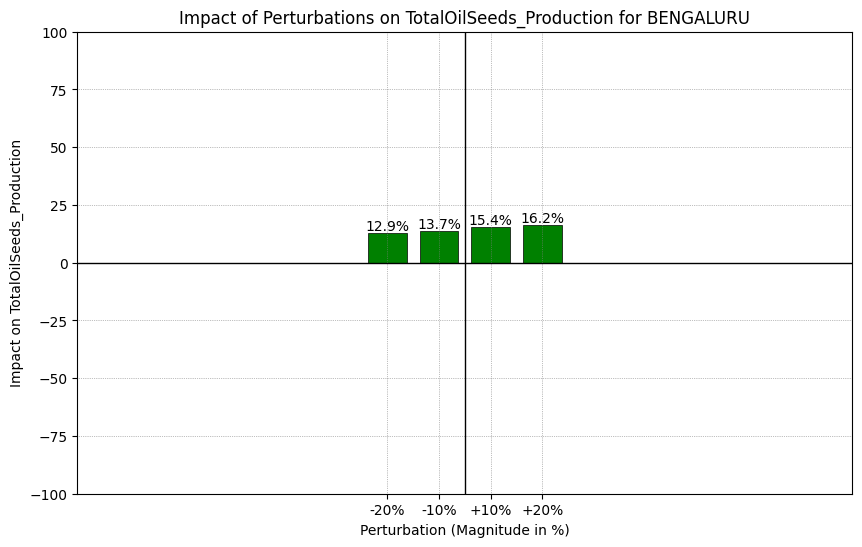

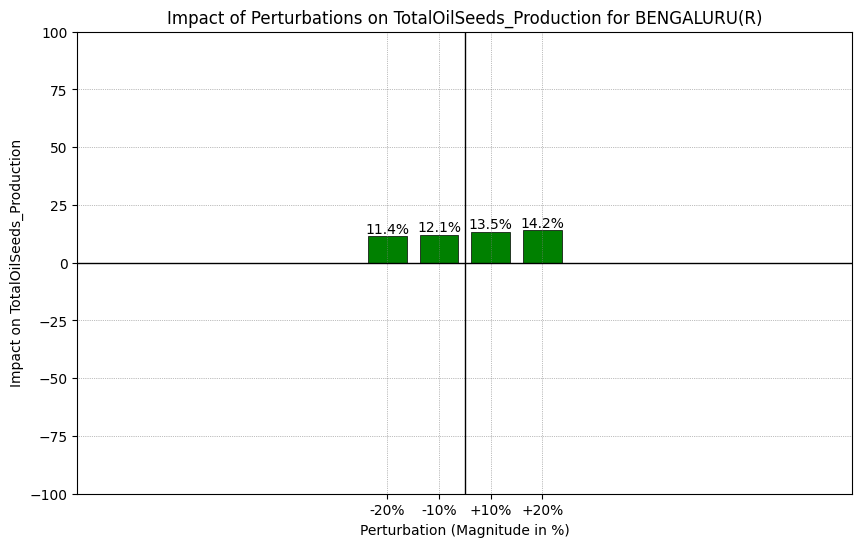

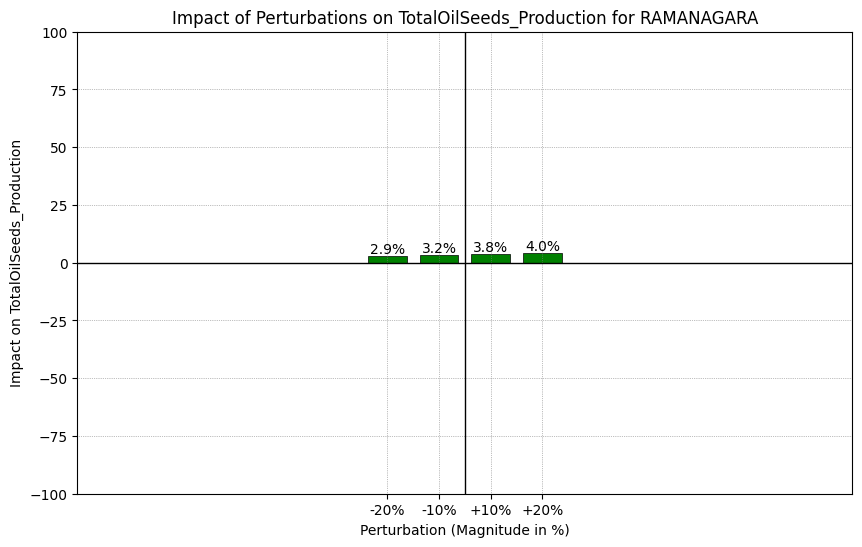

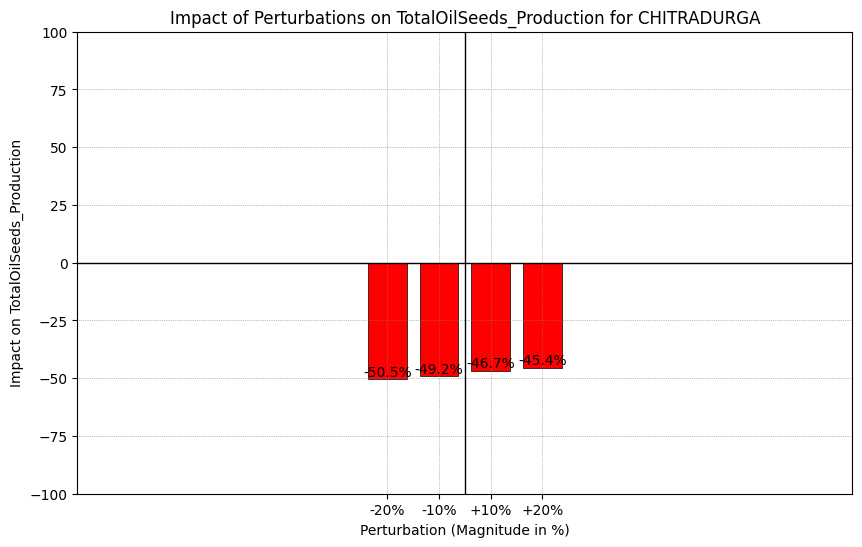

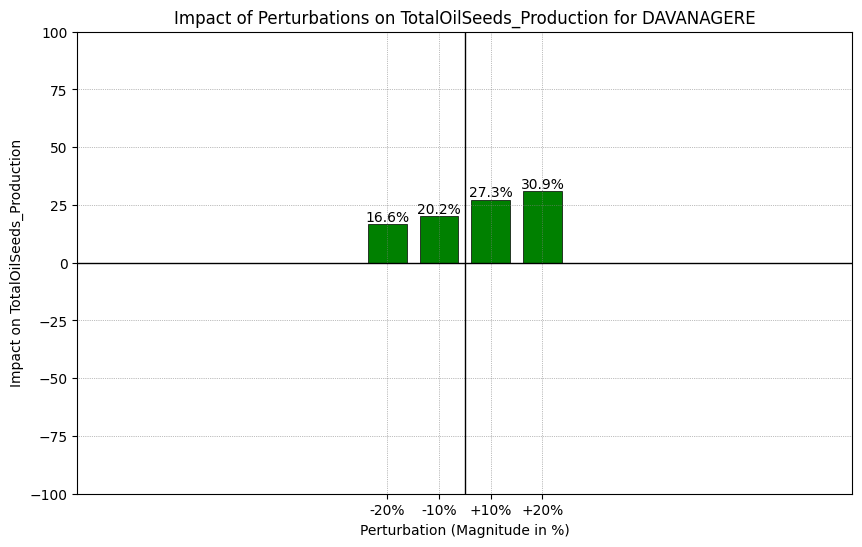

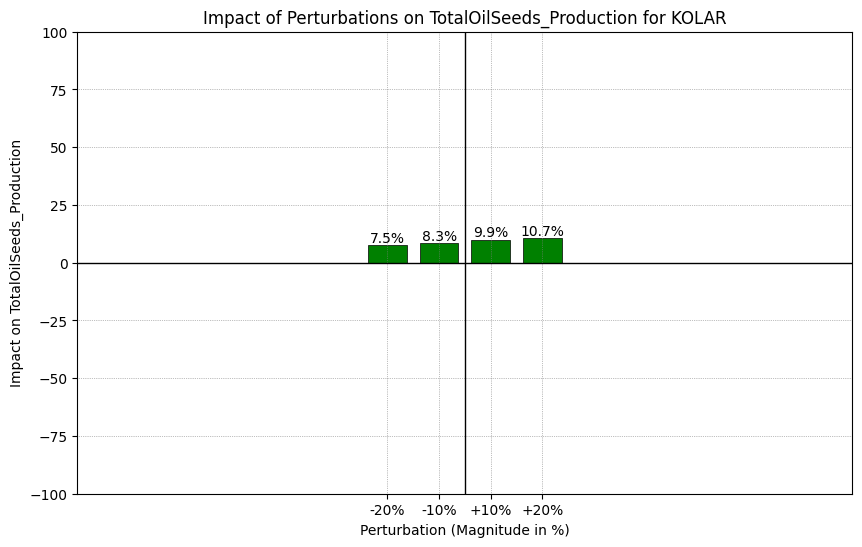

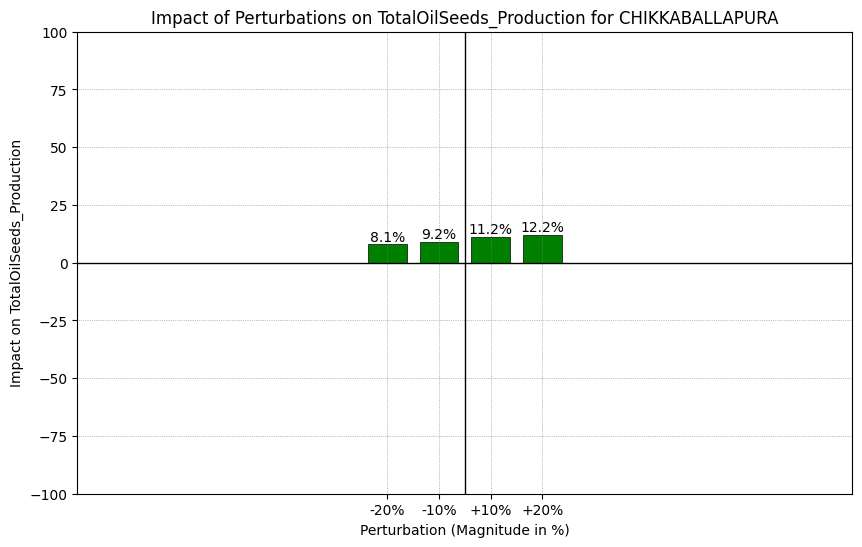

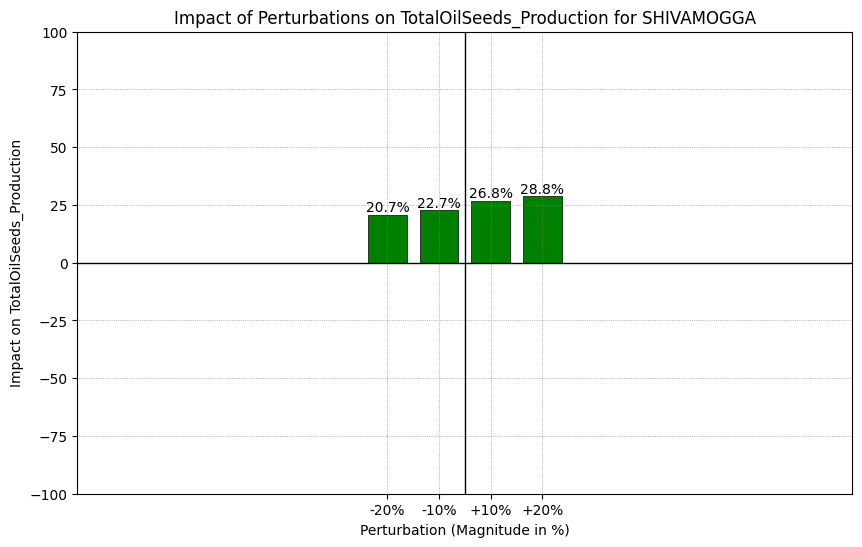

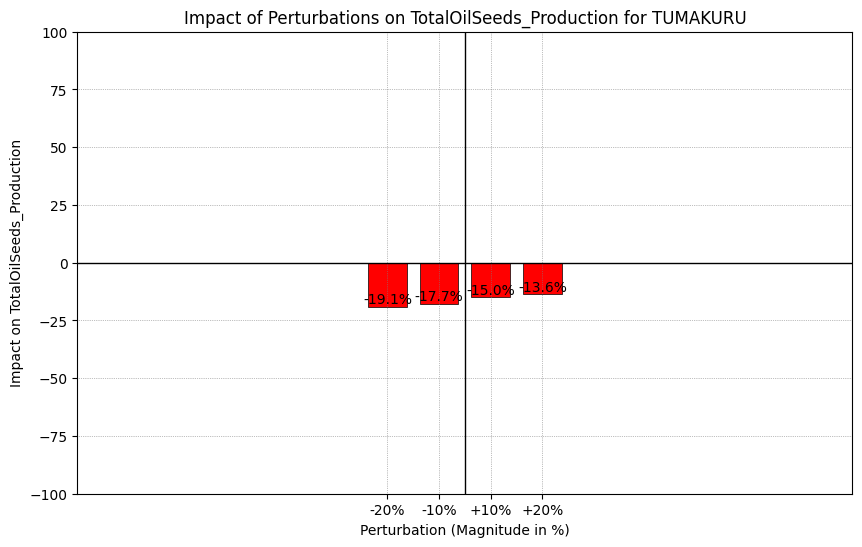

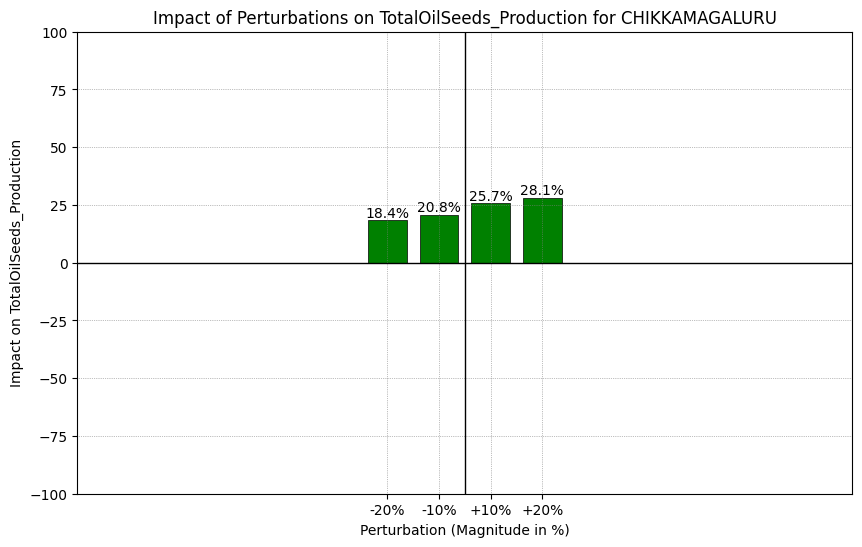

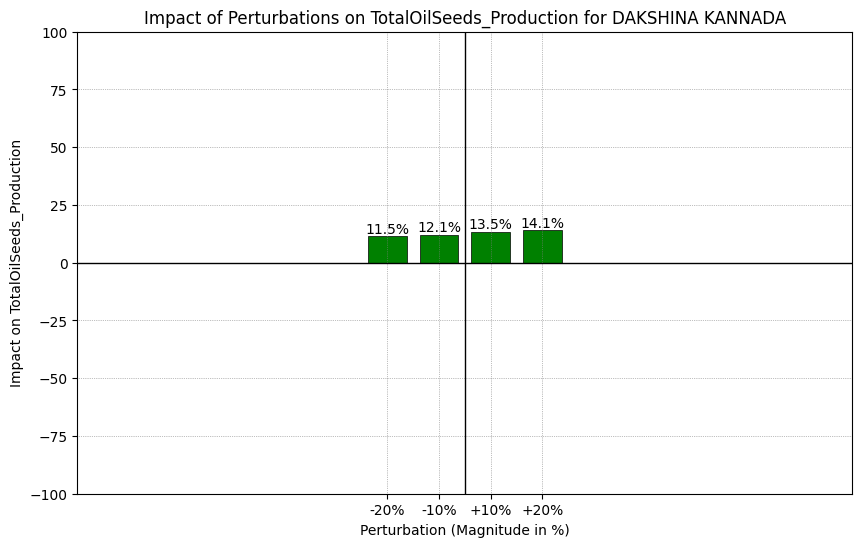

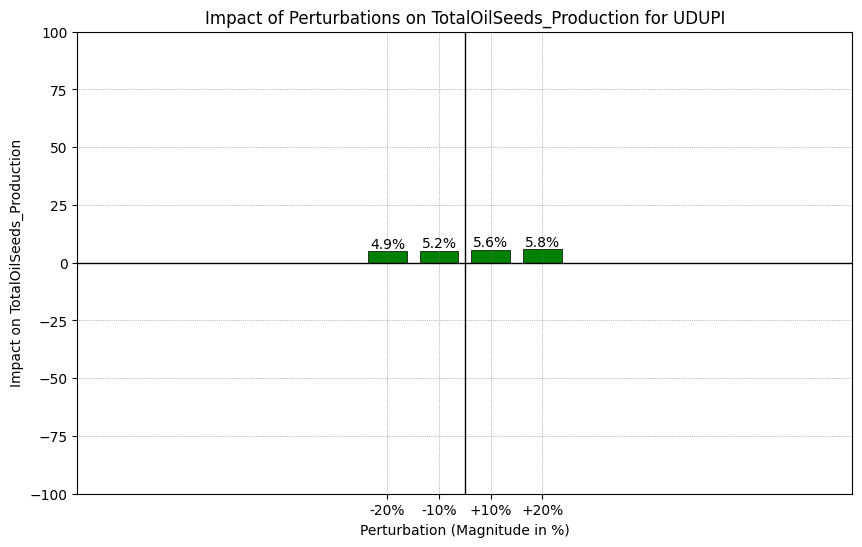

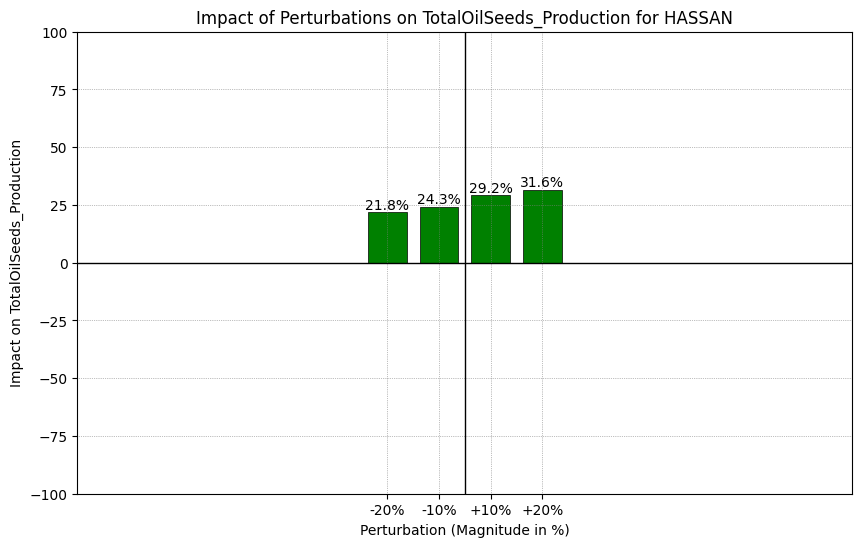

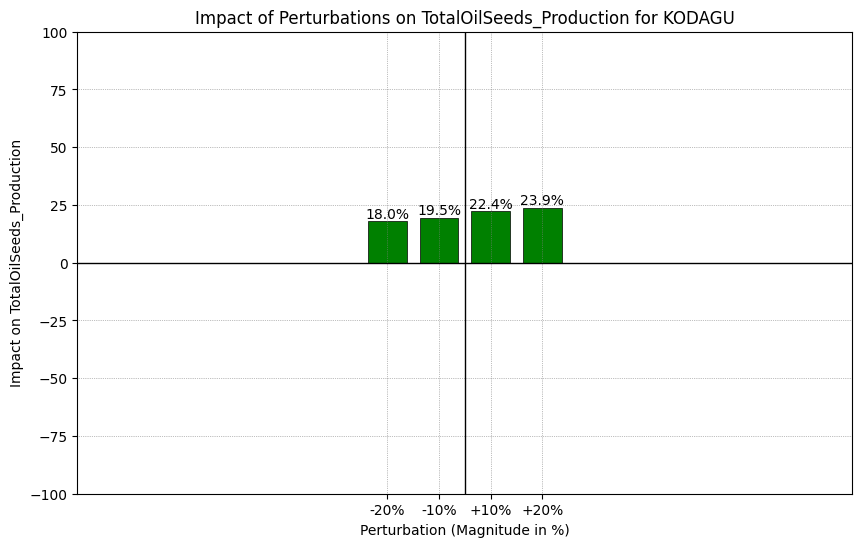

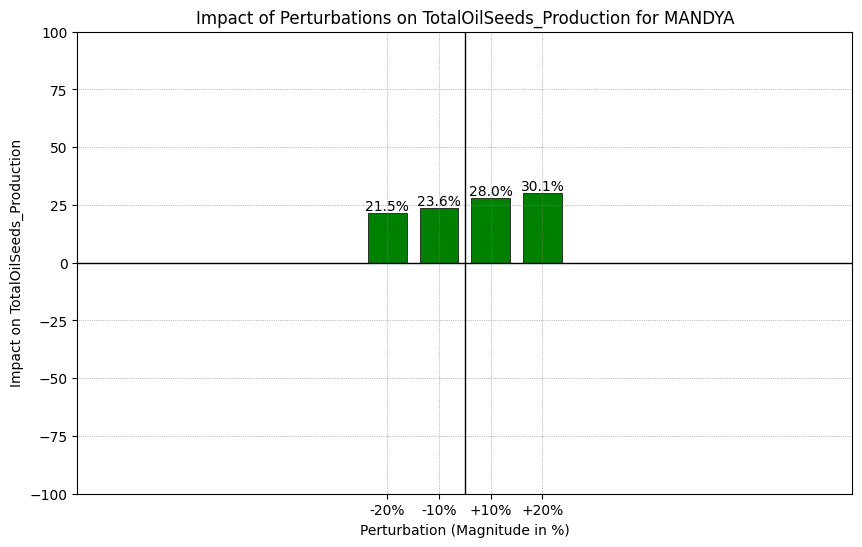

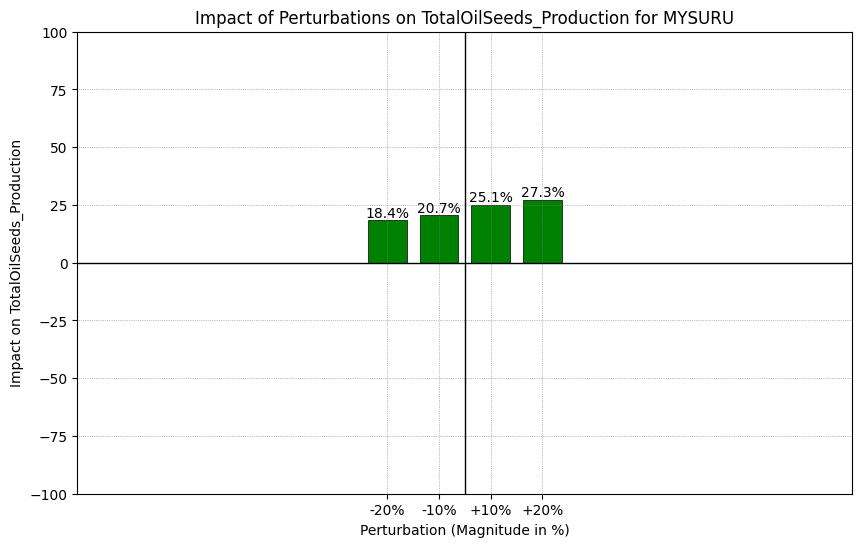

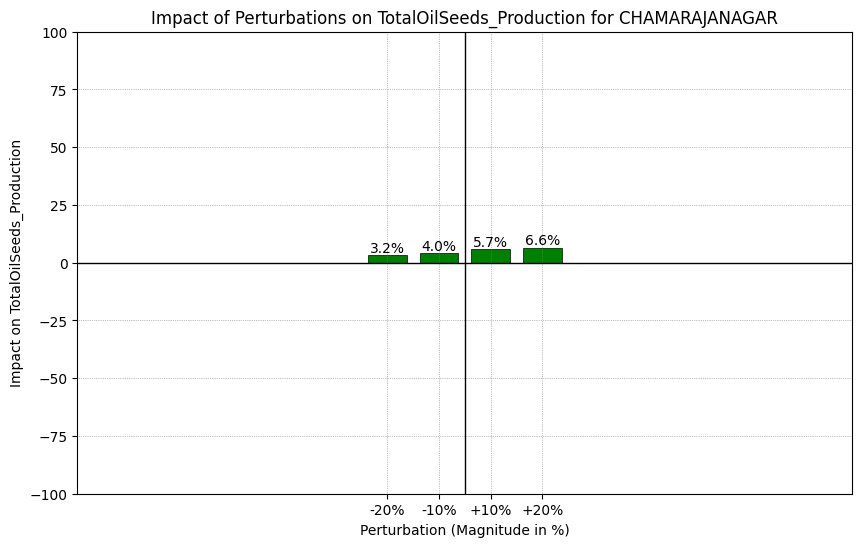

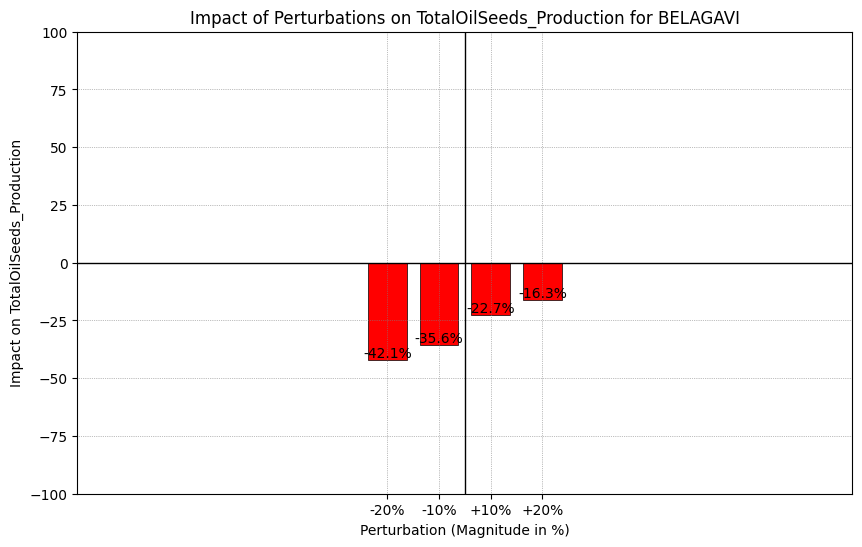

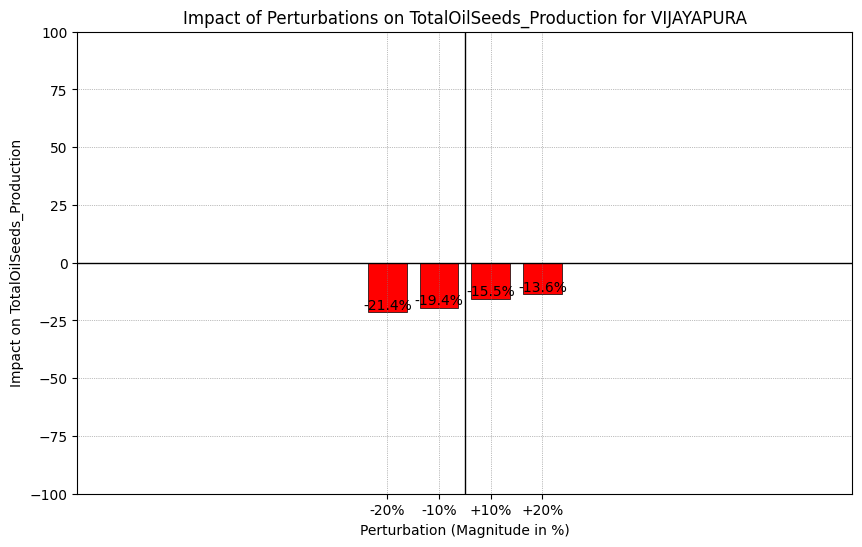

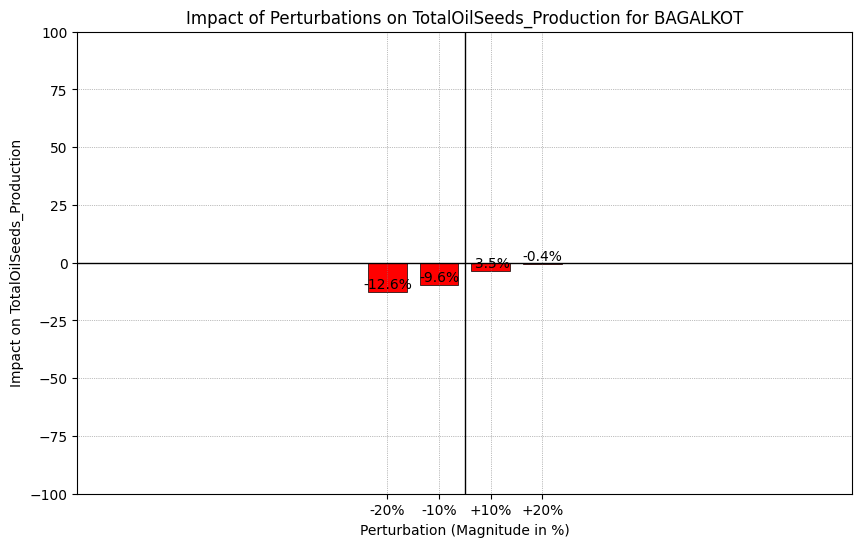

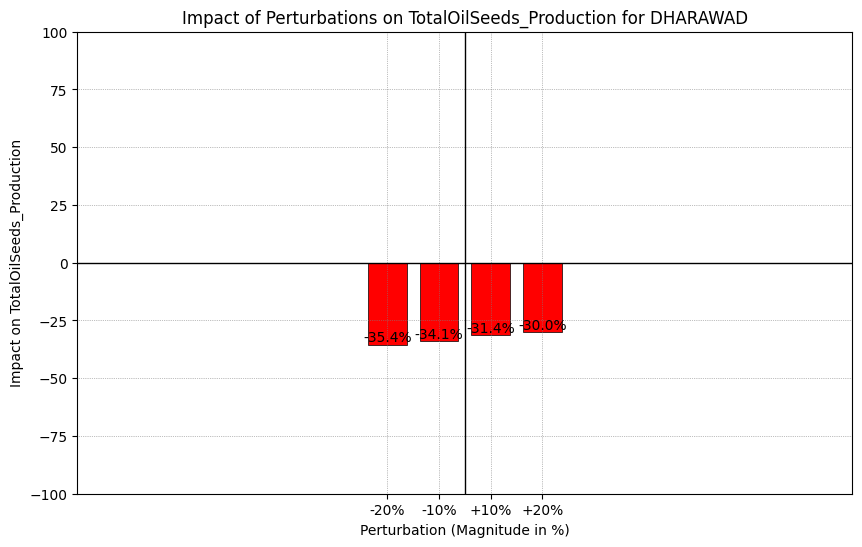

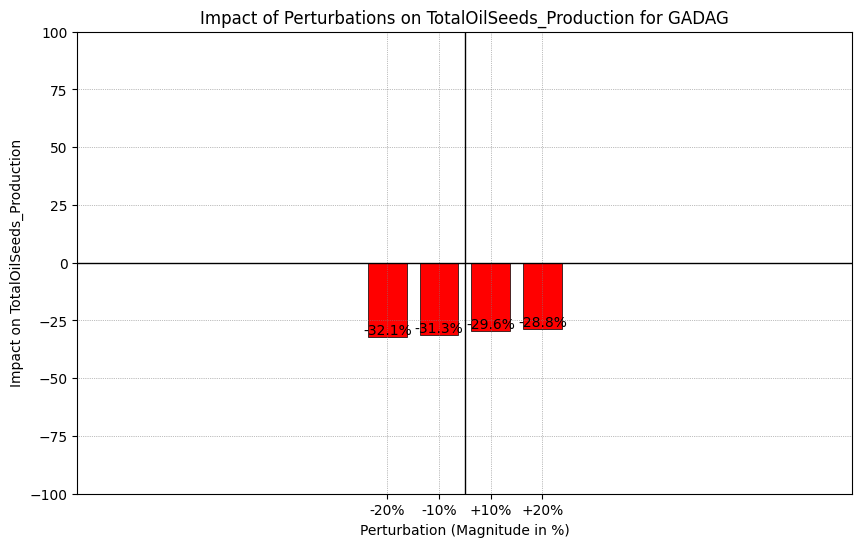

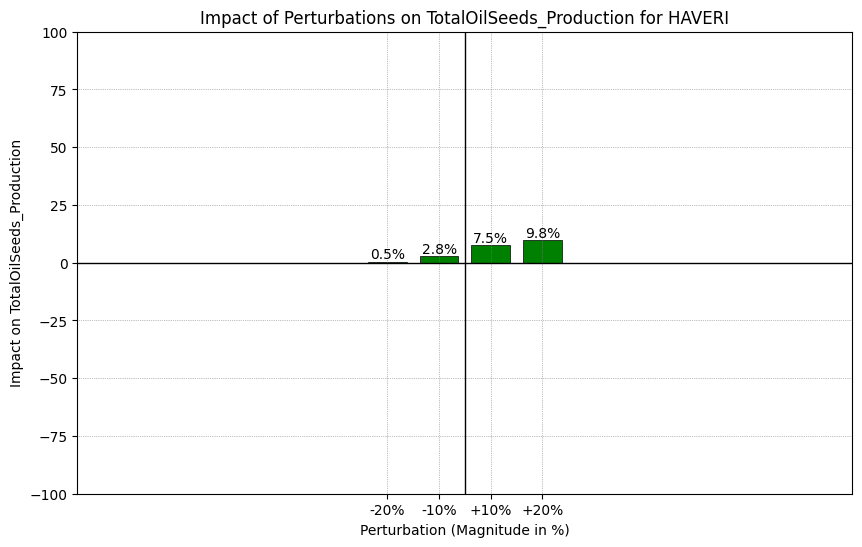

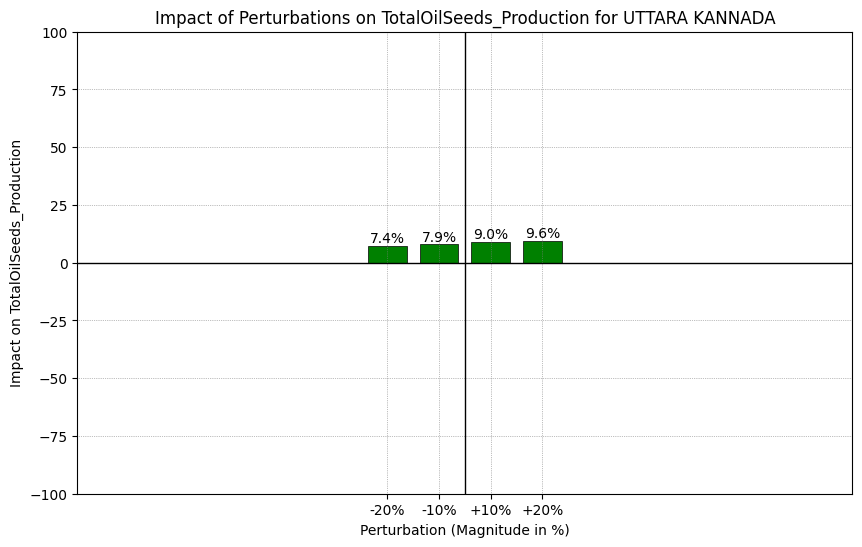

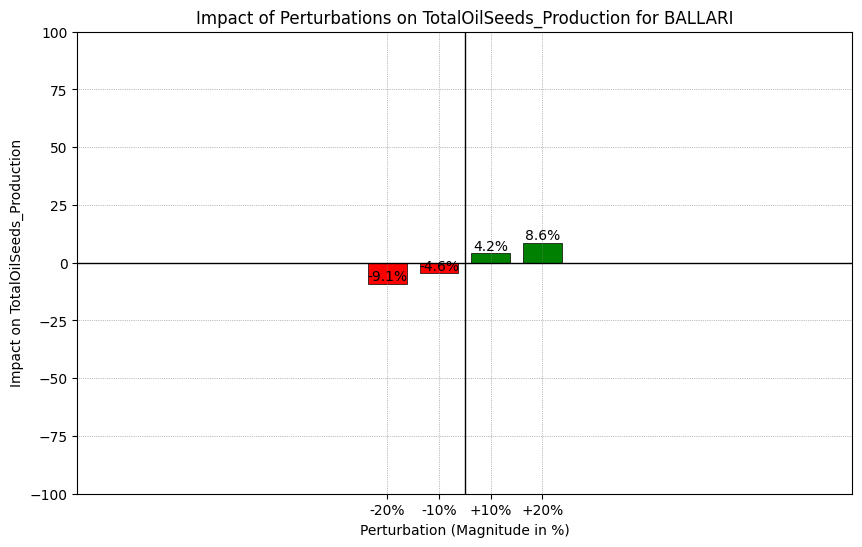

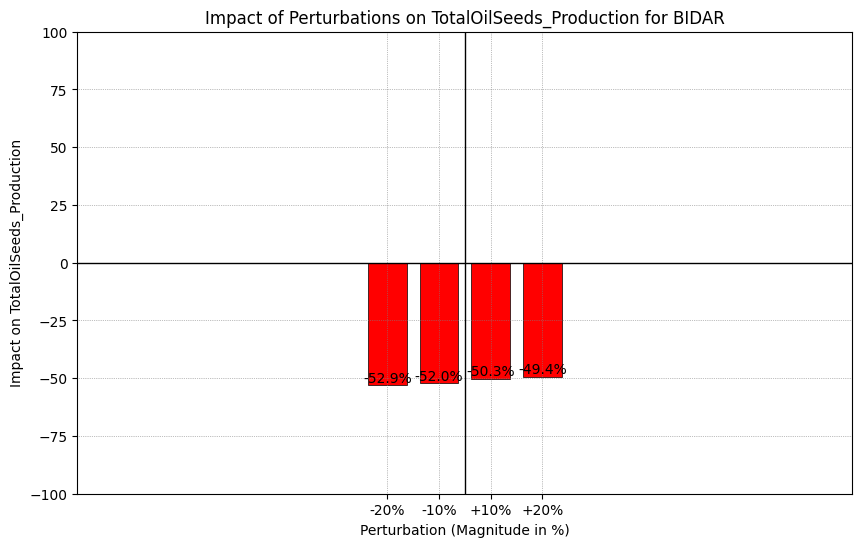

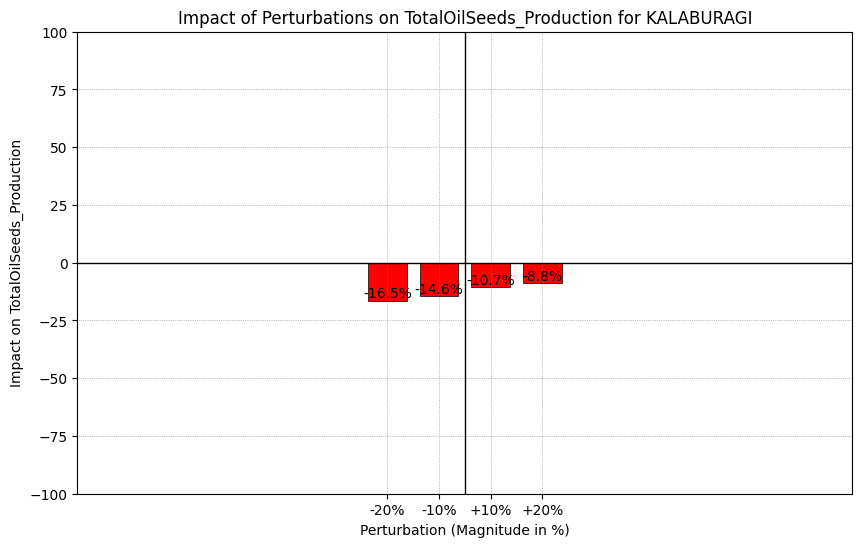

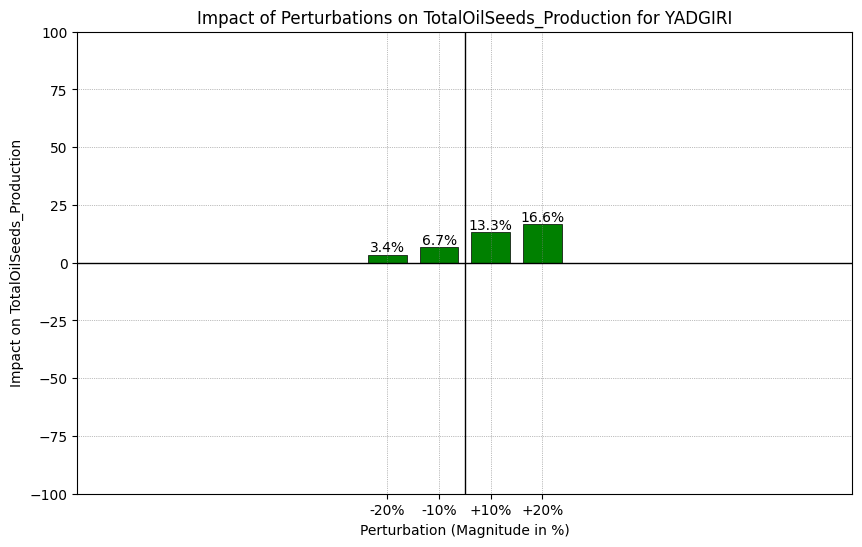

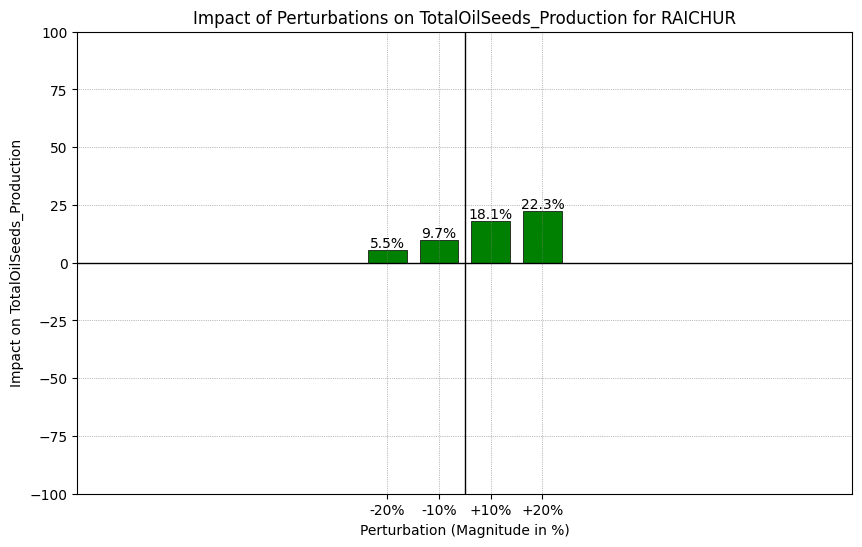

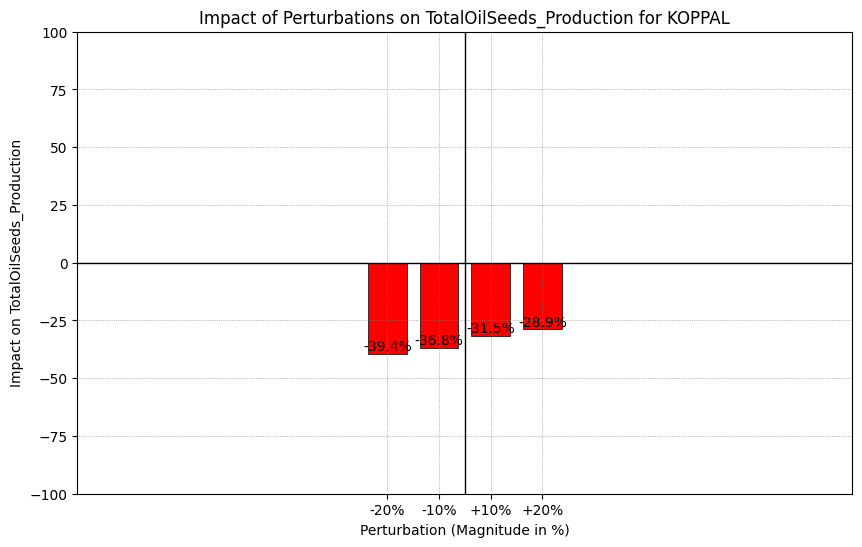

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

def generate_colors(impacts):
    # This function should be defined to generate colors based on impact values
    # It is not provided in the code snippet, so a placeholder is used
    # Adjust this function as needed
    colors = ['green' if impact > 0 else 'red' for impact in impacts]
    return colors

def plot_impact_analysis(file_path, factor, Capability_Vector, user_perturbations):
    """
    Perform analysis on the impact of perturbations on a given factor and plot the results.

    Parameters:
    - file_path: str, path to the dataset.
    - factor: str, the name of the factor column.
    - Capability_Vector: str, the name of the capability vector column.
    - user_perturbations: list, a list of perturbation percentages.
    """

    # Load the dataset
    data = pd.read_csv(file_path)

    # Performing linear regression
    X = data[[factor]]
    y = data[Capability_Vector]
    model = LinearRegression()
    model.fit(X, y)
    m = model.coef_[0]  # Slope
    c = model.intercept_  # Intercept

    # User provided perturbations in percentages
    perturbations_corrected = [p / 100.0 for p in user_perturbations]

    # Min-max normalization parameters for Capability_Vector
    cv_min = y.min()
    cv_max = y.max()

    # Loop through each unique district in the dataset
    for district in data['District'].unique():
        district_factor = data.loc[data['District'] == district, factor].iloc[0]
        cv_old = data.loc[data['District'] == district, Capability_Vector].iloc[0]
        normalized_old = (cv_old - cv_min) / (cv_max - cv_min)

        impacts = []

        for p in perturbations_corrected:
            perturbed_factor = district_factor * (1 + p)
            cv_new = m * perturbed_factor + c
            normalized_new = (cv_new - cv_min) / (cv_max - cv_min)
            impact = (normalized_new - normalized_old) * 100
            impacts.append(impact)

        colors = generate_colors(impacts)  # Assuming generate_colors function is defined elsewhere

        # Plotting
        plt.figure(figsize=(10, 6))
        bar_positions = np.arange(len(perturbations_corrected)) * 4 - 6  # Adjust for desired gap between bars
        bars = plt.bar(bar_positions, impacts, color=colors, edgecolor='black', linewidth=0.5, width=3)
        plt.xticks(bar_positions, [f'{p*100:+.0f}%' for p in perturbations_corrected])
        plt.xlabel('Perturbation (Magnitude in %)')
        plt.ylabel('Impact on ' + Capability_Vector)
        plt.title(f'Impact of Perturbations on {Capability_Vector} for {district}')
        plt.axhline(0, color='black', lw=1)
        plt.axvline(0, color='black', lw=1)

        # Adding gridlines
        plt.grid(True, linestyle=':', linewidth='0.5', color='gray')

        plt.xlim(-30, 30)
        plt.ylim(-100, 100)

        # Annotating the impact values with '%' suffix
        for bar, impact_value in zip(bars, impacts):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{impact_value:.1f}%',
                     ha='center', va='bottom')

        plt.show()

# Example usage
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Update this path as needed
factor = 'TotalNPK'  # This could be any factor like 'NPK', 'PesticideUse', etc.
Capability_Vector = 'TotalOilSeeds_Production'  # This could be any CV like 'Maize Production', 'Wheat Yield', etc.
user_perturbations = [-20, -10, 10, 20]  # Example perturbations in percentages

# Perform the analysis and plot for all districts
plot_impact_analysis(file_path, factor, Capability_Vector, user_perturbations)


In [ ]:
##############(4.)ALL 30 DISTRICT ANALYSIS ALTOGETHER

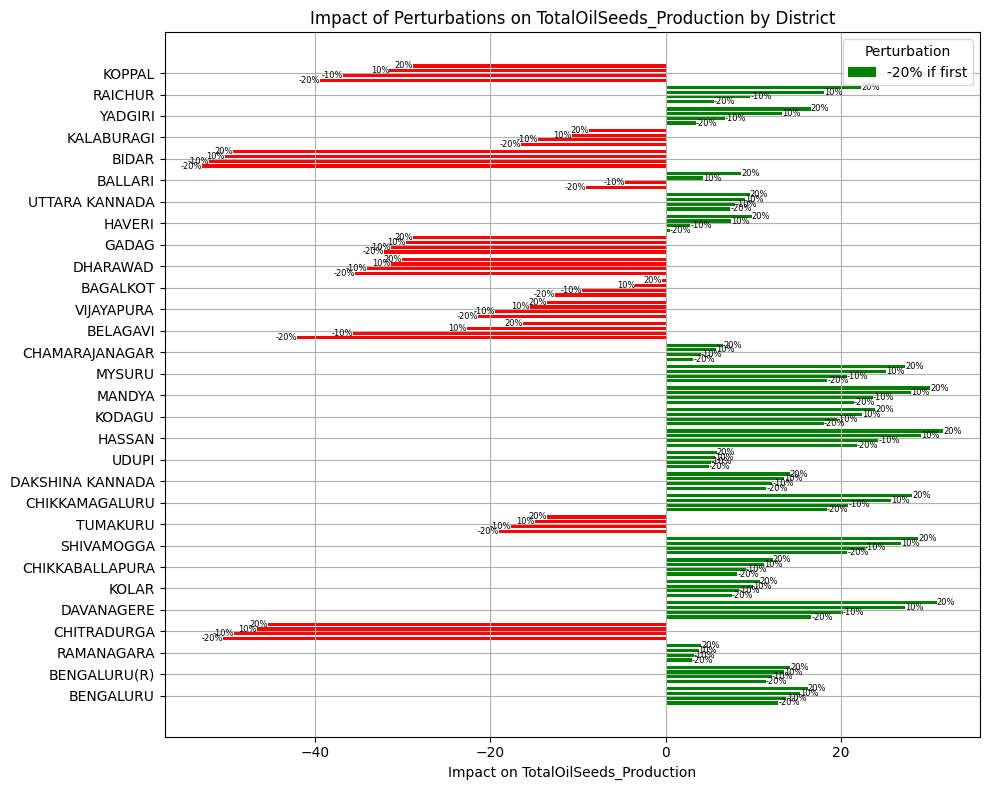

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

def generate_colors(impacts):
    # This function should be defined to generate colors based on impact values
    # It is not provided in the code snippet, so a placeholder is used
    # Adjust this function as needed
    colors = ['green' if impact > 0 else 'red' for impact in impacts]
    return colors

def plot_impact_analysis(file_path, factor, Capability_Vector, user_perturbations):
    """
    Perform analysis on the impact of perturbations on a given factor and plot the results.

    Parameters:
    - file_path: str, path to the dataset.
    - factor: str, the name of the factor column.
    - Capability_Vector: str, the name of the capability vector column.
    - user_perturbations: list, a list of perturbation percentages.
    """

    # Load the dataset
    data = pd.read_csv(file_path)

    # Performing linear regression on the entire dataset
    FACTOR = data[[factor]]
    CV = data[Capability_Vector]
    model = LinearRegression()
    model.fit(FACTOR, CV)
    m = model.coef_[0]  # Slope
    c = model.intercept_  # Intercept

    # User provided perturbations in percentages
    perturbations_corrected = [p / 100.0 for p in user_perturbations]

    # Min-max normalization parameters for Capability_Vector
    cv_min = CV.min()
    cv_max = CV.max()

    # Initialize lists to store impacts for all districts
    all_districts_impacts = [[] for _ in range(len(perturbations_corrected))]

    # Loop through each unique district in the dataset
    for district in data['District'].unique():
        district_factor_value = data.loc[data['District'] == district, factor].iloc[0]
        cv_old = data.loc[data['District'] == district, Capability_Vector].iloc[0]
        normalized_old = (cv_old - cv_min) / (cv_max - cv_min)

        impacts = []

        for p in perturbations_corrected:
            perturbed_factor_value = district_factor_value * (1 + p)
            cv_new = m * perturbed_factor_value + c
            normalized_new = (cv_new - cv_min) / (cv_max - cv_min)
            impact = (normalized_new - normalized_old) * 100
            impacts.append(impact)

        # Accumulate impacts for all districts
        for i, impact in enumerate(impacts):
            all_districts_impacts[i].append(impact)

    # Settings for visual distinction
    districts = data['District'].unique()
    district_count = len(districts)
    bar_height = 0.15
    gap_between_groups = 0.05
    gap_within_groups = 0.02

    # Calculate positions for bars
    bar_positions = np.arange(district_count)
    total_group_width = bar_height * len(user_perturbations) + gap_within_groups * (len(user_perturbations) - 1)
    start_position = np.linspace(-total_group_width / 2, total_group_width / 2, len(user_perturbations))

    # Plot
    plt.figure(figsize=(10, 8))

    for i, perturbation in enumerate(user_perturbations):
        offsets = start_position[i]
        colors = generate_colors(all_districts_impacts[i])
        for j, district in enumerate(districts):
            impact = all_districts_impacts[i][j]
            position = bar_positions[j] + offsets
            plt.barh(position, impact, height=bar_height, color=colors[j], label=f'{perturbation}% if first' if i == 0 and j == 0 else "")
            plt.text(impact, position, f'{perturbation}%', va='center', ha='right' if impact < 0 else 'left', fontsize=6)

    plt.yticks(bar_positions, districts)
    plt.xlabel('Impact on ' + Capability_Vector)
    plt.title('Impact of Perturbations on ' + Capability_Vector + ' by District')
    plt.legend(title='Perturbation')
    plt.grid(True)  # Enable grid lines on both axes
    plt.tight_layout()
    plt.show()

# Example usage
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Update this path as needed
factor = 'TotalNPK'  # This could be any factor like 'NPK', 'PesticideUse', etc.
Capability_Vector = 'TotalOilSeeds_Production'  # This could be any CV like 'Maize Production', 'Wheat Yield', etc.
user_perturbations = [-20, -10, 10, 20]  # Example perturbations in percentages

# Perform the analysis and plot for all districts
plot_impact_analysis(file_path, factor, Capability_Vector, user_perturbations)


In [ ]:
###########(5.)WHICH PERTURBATION TO CHOOSE

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def choose_perturbation(data, Factor, Capability_Vector, user_perturbations):
    # Performing linear regression on the entire dataset
    X = data[[Factor]]
    y = data[Capability_Vector]
    model = LinearRegression()
    model.fit(X, y)
    m = model.coef_[0]  # Slope
    c = model.intercept_  # Intercept

    # Converting percentages to fractions for calculation
    perturbations_corrected = [p / 100.0 for p in user_perturbations]

    # Min-max normalization parameters for Capability_Vector
    cv_min = y.min()
    cv_max = y.max()

    # Initialize an empty list to store results for each district
    district_results = []

    # Loop through each unique district in the dataset
    for district in data['District'].unique():
        district_factor = data.loc[data['District'] == district, Factor].iloc[0]
        cv_old = data.loc[data['District'] == district, Capability_Vector].iloc[0]
        normalized_old = (cv_old - cv_min) / (cv_max - cv_min)
        positive_impacts = []
        negative_impacts = []
        for p in perturbations_corrected:
            perturbed_factor = district_factor * (1 + p)
            cv_new = m * perturbed_factor + c
            normalized_new = (cv_new - cv_min) / (cv_max - cv_min)
            impact = (normalized_new - normalized_old) * 100
            if impact > 0:
                positive_impacts.append((impact, p))
            elif impact < 0:
                negative_impacts.append((impact, p))
        # Choose perturbation based on conditions
        if positive_impacts and not negative_impacts:
            chosen_perturbation = max(positive_impacts)[1]
        elif not positive_impacts and negative_impacts:
            chosen_perturbation = max(negative_impacts)[1]
        elif positive_impacts and negative_impacts:
            chosen_perturbation = max(positive_impacts)[1]
        district_results.append({
            'District': district,
            'Perturbation_Choosen': f'P{user_perturbations.index(chosen_perturbation*100)+1}'
        })
    # Convert the results into a DataFrame and return
    return pd.DataFrame(district_results)

# Load the dataset
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Adjust this path as needed
data = pd.read_csv(file_path)

# User provided perturbations in percentages
user_perturbations = [-20, -10, 10, 20]

# Example usage
Factor = 'TotalNPK'
Capability_Vector = 'TotalOilSeeds_Production'
results_df = choose_perturbation(data, Factor, Capability_Vector, user_perturbations)
print(results_df)


            District Perturbation_Choosen
0          BENGALURU                   P4
1       BENGALURU(R)                   P4
2         RAMANAGARA                   P4
3        CHITRADURGA                   P4
4         DAVANAGERE                   P4
5              KOLAR                   P4
6    CHIKKABALLAPURA                   P4
7         SHIVAMOGGA                   P4
8           TUMAKURU                   P4
9     CHIKKAMAGALURU                   P4
10  DAKSHINA KANNADA                   P4
11             UDUPI                   P4
12            HASSAN                   P4
13            KODAGU                   P4
14            MANDYA                   P4
15            MYSURU                   P4
16    CHAMARAJANAGAR                   P4
17          BELAGAVI                   P4
18        VIJAYAPURA                   P4
19          BAGALKOT                   P4
20          DHARAWAD                   P4
21             GADAG                   P4
22            HAVERI              

In [ ]:
#########(6.)HEATMAP ANALYSIS

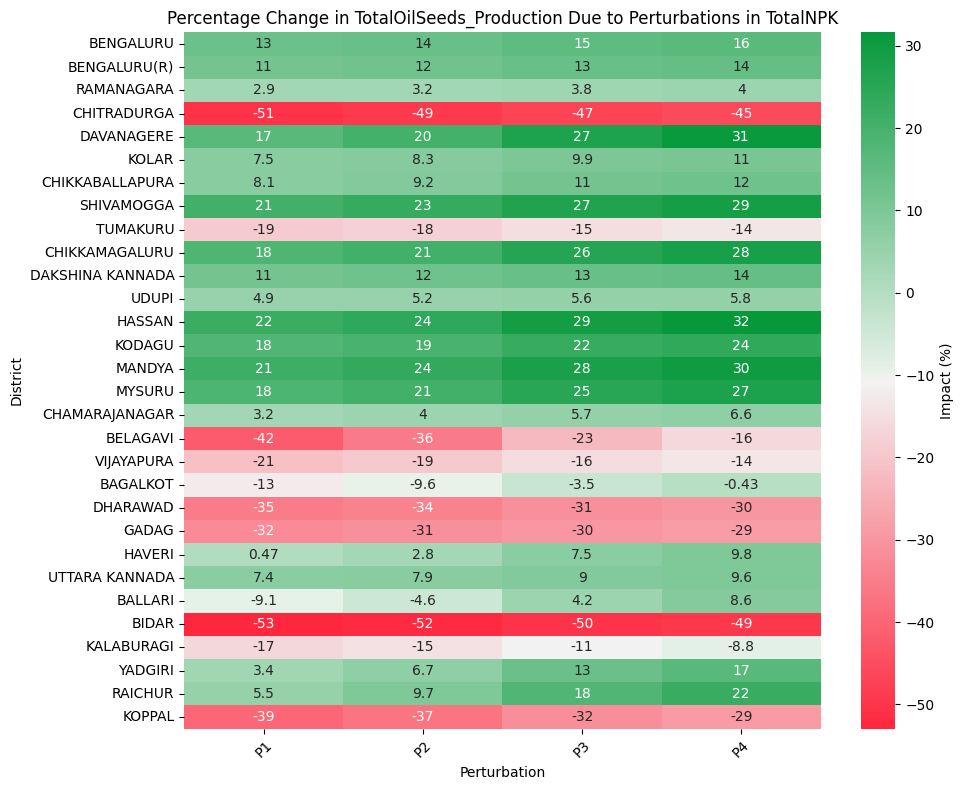

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def impact_of_perturbations(file_path, factor, capability_vector, user_perturbations):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Performing linear regression on the specified factor against the capability vector
    X = data[[factor]]
    y = data[capability_vector]
    model = LinearRegression()
    model.fit(X, y)
    m = model.coef_[0]  # Slope of the regression
    c = model.intercept_  # Intercept of the regression

    # Convert user perturbations from percentages to multipliers
    perturbations_corrected = [p / 100.0 for p in user_perturbations]

    # Calculate the impact of each perturbation for each district
    impact_results = []
    for district in data['District'].unique():
        district_data = []
        district_factor_value = data.loc[data['District'] == district, factor].iloc[0]
        original_capability_value = data.loc[data['District'] == district, capability_vector].iloc[0]
        for perturbation in perturbations_corrected:
            perturbed_factor_value = district_factor_value * (1 + perturbation)
            predicted_capability_value = m * perturbed_factor_value + c
            normalized_new = (predicted_capability_value - y.min()) / (y.max() - y.min())
            normalized_old = (original_capability_value - y.min()) / (y.max() - y.min())
            impact = (normalized_new - normalized_old) * 100
            district_data.append(impact)
        impact_results.append(district_data)

    # Create a DataFrame for the heatmap
    impact_df = pd.DataFrame(impact_results, columns=[f'P{i+1}' for i in range(len(user_perturbations))], index=data['District'].unique())

    # Plotting the heatmap
    cmap = sns.diverging_palette(10, 133, s=99, l=55, sep=3, as_cmap=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(impact_df, cmap=cmap, annot=True, cbar_kws={'label': 'Impact (%)'})
    plt.title(f'Percentage Change in {capability_vector} Due to Perturbations in {factor}')
    plt.ylabel('District')
    plt.xlabel('Perturbation')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Adjust this path as needed
factor = 'TotalNPK'  # Factor to analyze
capability_vector = 'TotalOilSeeds_Production'  # Target capability vector
user_perturbations = [-20, -10, 10, 20]  # Perturbations in percentages

# Call the function
impact_of_perturbations(file_path, factor, capability_vector, user_perturbations)
